In [156]:
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [157]:
data = pd.read_excel('Bank_Personal_Loan_Modelling-1 (1).xlsx',1)

In [158]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


a. Find out number of rows; no. & types of variables (continuous, categorical etc.)

In [159]:
data.shape

(5000, 14)

In [160]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [161]:
num_cols = ['Age', 'Experience', 'Income','CCAvg','Mortgage']
cat_cols = ['Family', 'Education', 'Personal Loan',
 'Securities Account','CD Account', 'Online', 'CreditCard']

In [162]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


In [163]:
print(data['Family'].value_counts(normalize=True))

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64


In [164]:
data['Education'].value_counts(normalize=True)

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

In [165]:
data['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [166]:
data['Securities Account'].value_counts(normalize=True)

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

In [167]:
data['CD Account'].value_counts(normalize=True)

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

In [168]:
data['Online'].value_counts(normalize=True)

1    0.5968
0    0.4032
Name: Online, dtype: float64

In [169]:
data['CreditCard'].value_counts(normalize=True)

0    0.706
1    0.294
Name: CreditCard, dtype: float64

In [170]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

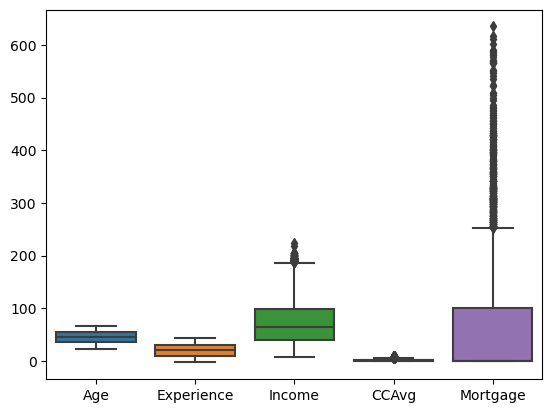

In [171]:
import seaborn as sns
sns.boxplot(data[num_cols]);

Treat the outliers

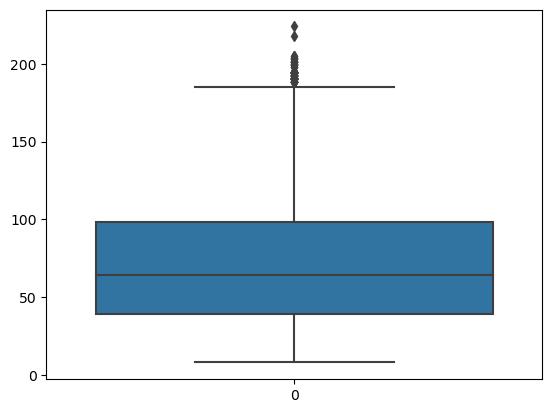

In [172]:
sns.boxplot(data['Income']);

In [173]:
data[data['Income'] >210]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3896,3897,48,24,224,93940,2,6.666667,1,0,0,0,1,1,1
4993,4994,45,21,218,91801,2,6.666667,1,0,0,0,0,1,0


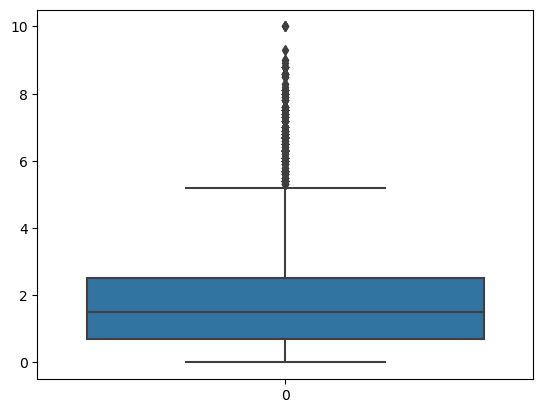

In [174]:
sns.boxplot(data['CCAvg']);

In [175]:
data[data['CCAvg']>8.8]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
787,788,45,15,202,91380,3,10.0,3,0,1,0,0,0,0
1339,1340,52,25,180,94545,2,9.0,2,297,1,0,0,1,0
2101,2102,35,5,203,95032,1,10.0,3,0,1,0,0,0,0
2337,2338,43,16,201,95054,1,10.0,2,0,1,0,0,0,1
3822,3823,63,33,178,91768,4,9.0,3,0,1,0,0,0,0
3943,3944,61,36,188,91360,1,9.3,2,0,1,0,0,0,0


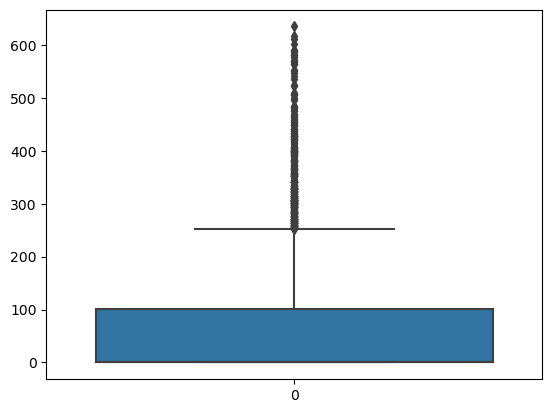

In [176]:
sns.boxplot(data['Mortgage']);

In [177]:
data[data['Mortgage']>550]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
303,304,49,25,195,95605,4,3.0,1,617,1,0,0,0,0
782,783,54,30,194,92056,3,6.0,3,587,1,1,1,1,1
1716,1717,32,8,200,91330,2,6.5,1,565,0,0,0,1,0
1783,1784,53,27,192,94720,1,1.7,1,601,0,0,0,1,0
1789,1790,44,20,171,91330,4,0.7,1,567,1,0,1,1,1
1937,1938,51,25,181,95051,1,3.3,3,589,1,1,1,1,0
2541,2542,34,8,171,90212,2,2.2,2,569,1,0,0,1,0
2769,2770,33,9,183,91320,2,8.8,3,582,1,0,0,1,0
2841,2842,37,11,190,94305,4,7.3,2,565,1,0,1,1,0
2934,2935,37,13,195,91763,2,6.5,1,635,0,0,0,1,0


In [178]:
data = data[(data['Income'] >210) | (data['CCAvg']<8.8) | (data['Mortgage']>600)]

In [179]:
data.shape

(4984, 14)

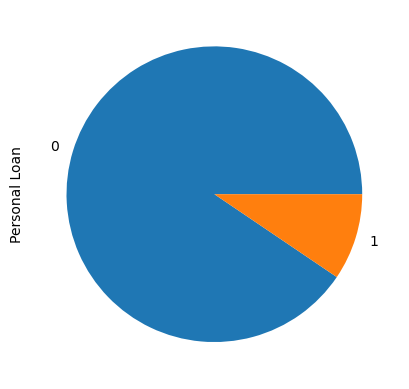

In [180]:
import matplotlib.pyplot as plt
data['Personal Loan'].value_counts(normalize=True).plot(kind='pie');

In [181]:
cat_cols = ['Family','Personal Loan',
 'Education',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [182]:
cat_cols1 = ['Family',
 'Education',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

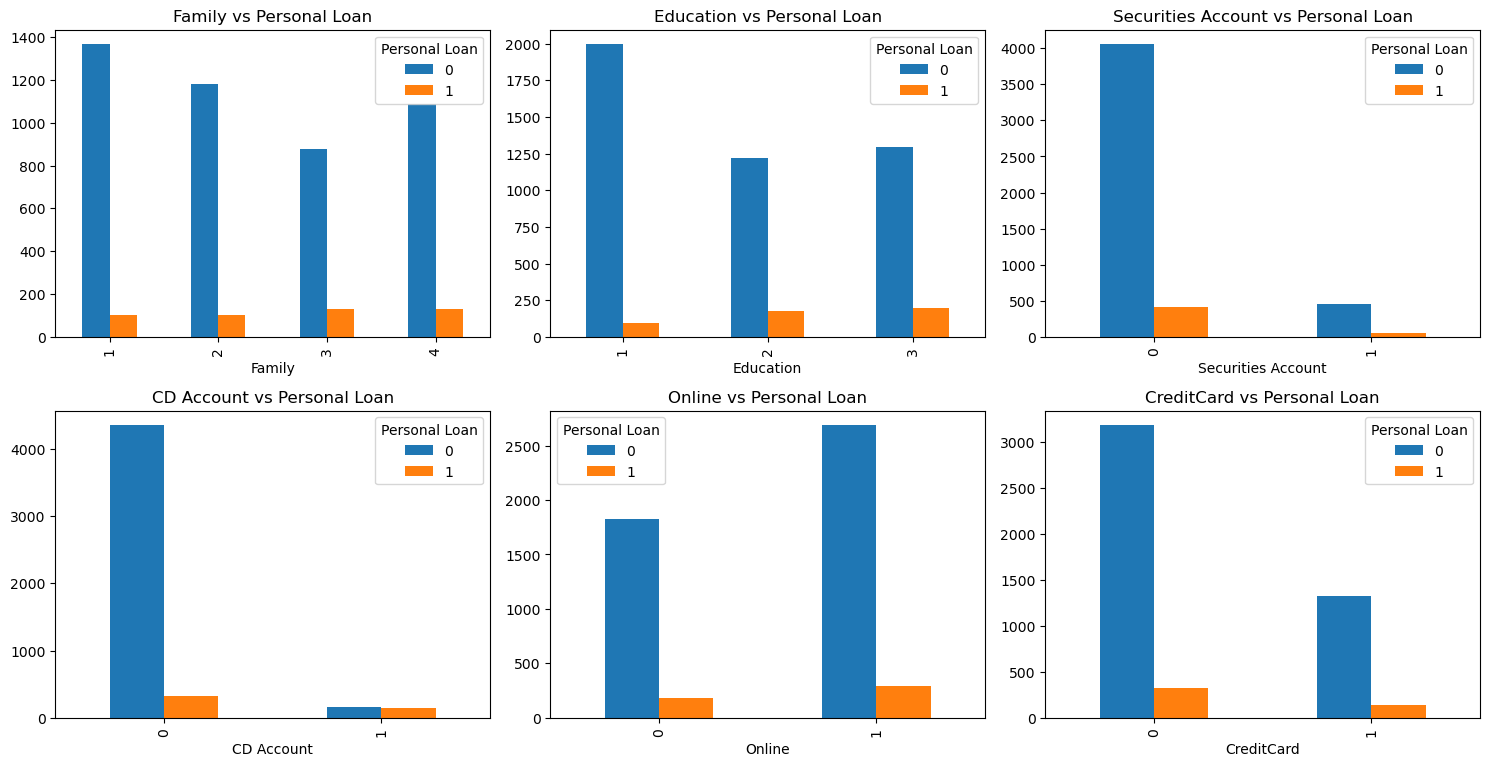

In [183]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
t = 1
for i in cat_cols1:
    plt.subplot(4,3,t)
    pd.crosstab(data[i],data['Personal Loan']).plot(kind='bar',ax=plt.gca())
    plt.title(f'{i} vs Personal Loan')
    t = t + 1
plt.tight_layout()
plt.show()

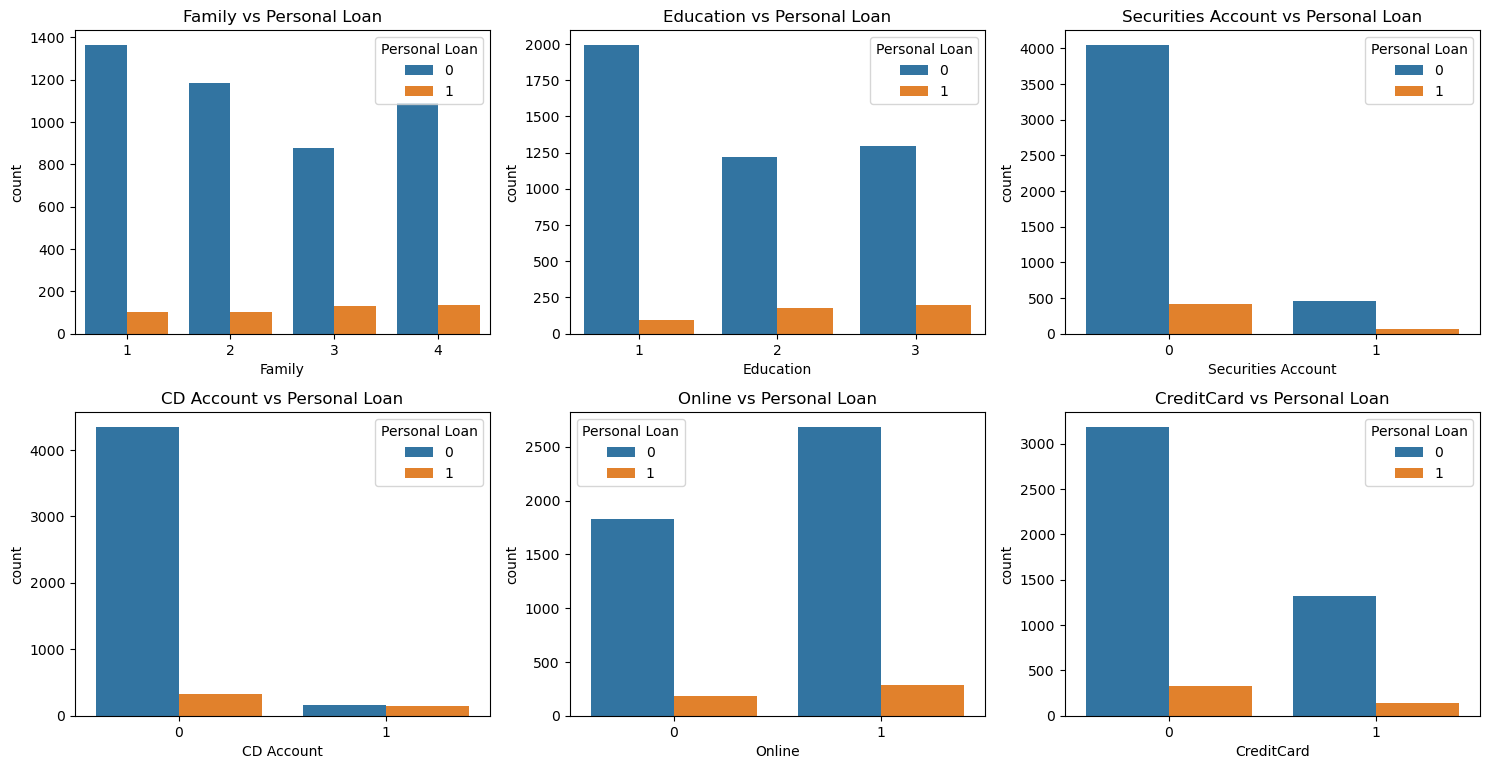

In [184]:
plt.figure(figsize=(15, 15))
t = 1
for i in cat_cols1:
    plt.subplot(4,3,t)
    sns.countplot(x=data[i], hue=data['Personal Loan'])
    plt.title(f'{i} vs Personal Loan')
    t = t + 1
plt.tight_layout()
plt.show()

In [185]:
from dython.nominal import cramers_v
cramers_matx = pd.DataFrame(index=cat_cols,columns=cat_cols)
for i in cat_cols:
    for j in cat_cols:
        if i != j:
            cramers_matx.loc[i,j] = cramers_v(data[i],data[j])

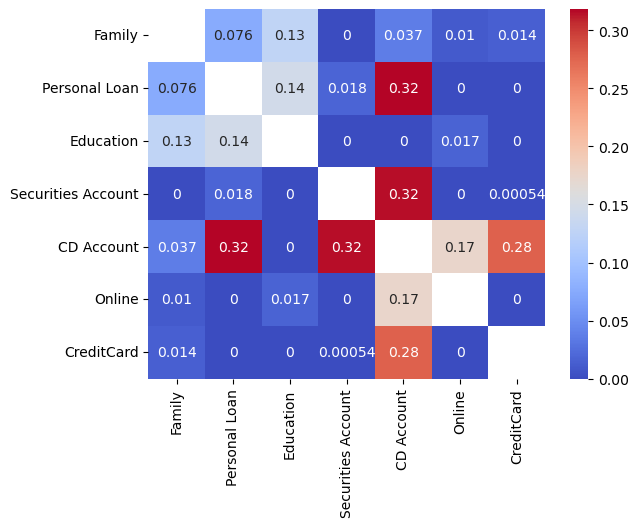

In [186]:
sns.heatmap(cramers_matx.astype(float),annot=True,cmap='coolwarm');

From this plot i want to remove the variables CreditCard,Online,Securities Account But we exclude these on the basis of statistical tests.

<Axes: >

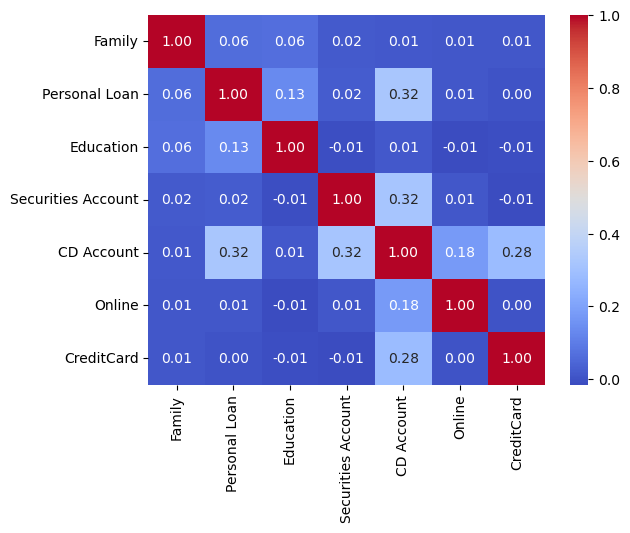

In [187]:
sns.heatmap(data[cat_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')

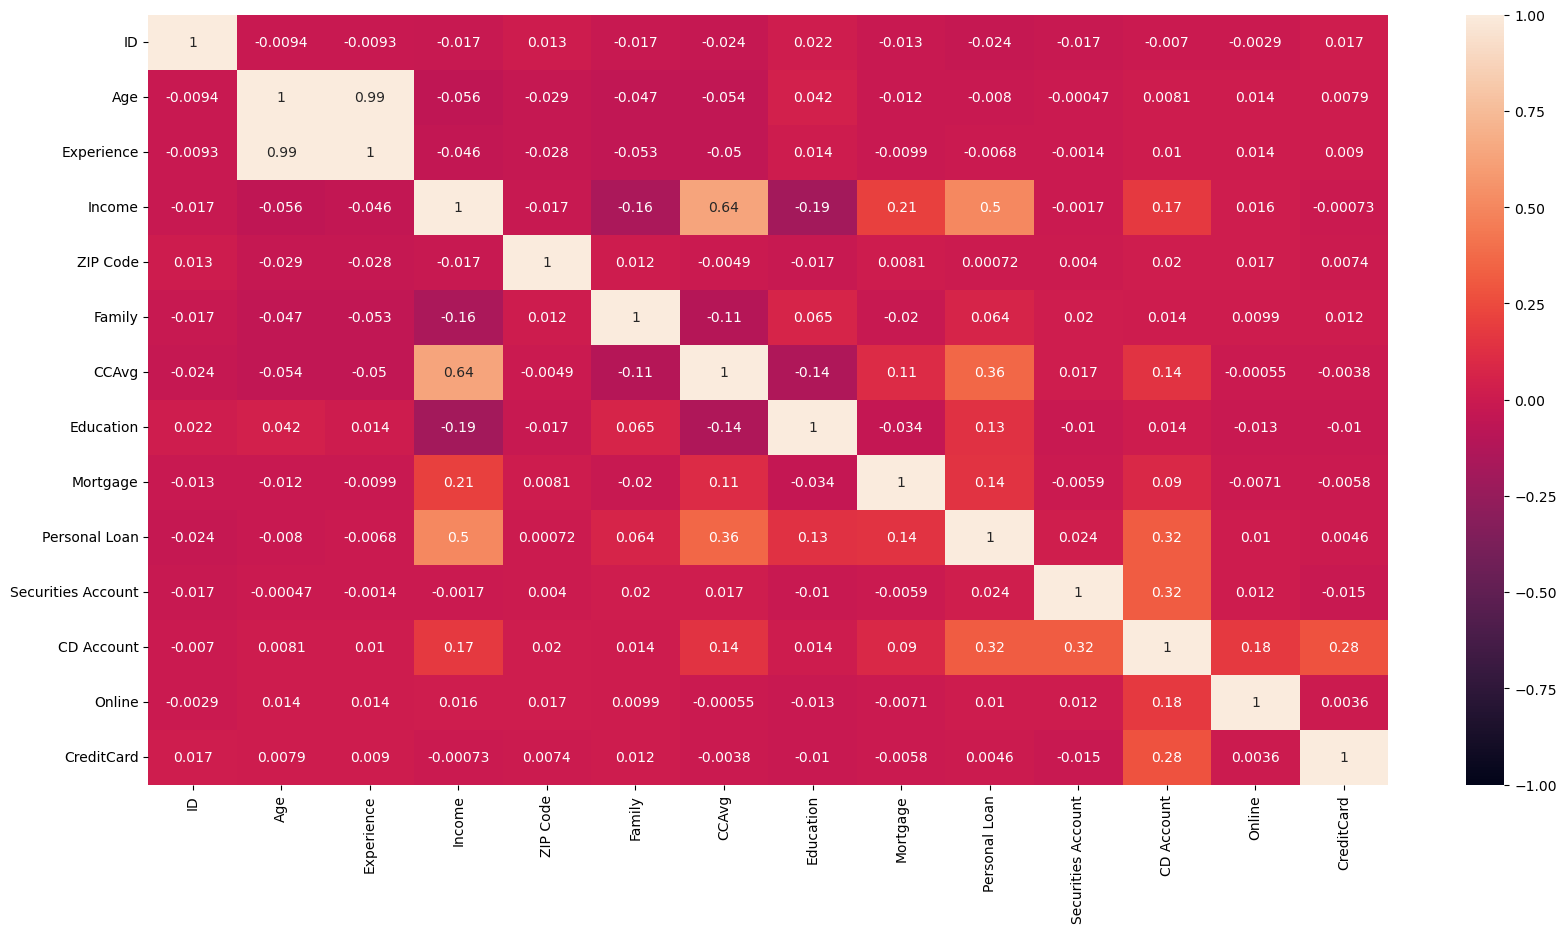

In [188]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1);

In [189]:
from scipy.stats import chi2_contingency

for column in cat_cols1:
    contingency_table = pd.crosstab(data[column], data['Personal Loan'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {column}: p-value = {p_value}")

Chi-square test for Family: p-value = 6.946343679736318e-07
Chi-square test for Education: p-value = 1.0856701353126457e-23
Chi-square test for Securities Account: p-value = 0.10818047717792435
Chi-square test for CD Account: p-value = 5.62169785258977e-112
Chi-square test for Online: p-value = 0.5110205805677208
Chi-square test for CreditCard: p-value = 0.7849563504293893


In [190]:
num_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage','ID','ZIP Code']

In [191]:
from scipy.stats import ttest_ind
group_0 = data.loc[data['Personal Loan']==1,'Age']

group_1 = data.loc[data['Personal Loan']==0,'Age']
t_statistic, p_value = ttest_ind(group_0, group_1)
print(f"t-test for Age: p-value = {p_value}")

t-test for Age: p-value = 0.5733253300528455


In [192]:
from scipy.stats import ttest_ind

for column in num_cols:
    group_0 = data[data['Personal Loan'] == 0][column]
    group_1 = data[data['Personal Loan'] == 1][column]
    
    t_statistic, p_value = ttest_ind(group_0, group_1)
    print(f"t-test for {column}: p-value = {p_value}")


t-test for Age: p-value = 0.5733253300528455
t-test for Experience: p-value = 0.6322154774693014
t-test for Income: p-value = 0.0
t-test for CCAvg: p-value = 7.240189907496832e-153
t-test for Mortgage: p-value = 1.1107167222015169e-23
t-test for ID: p-value = 0.0930882567573071
t-test for ZIP Code: p-value = 0.9596510471663608


In [193]:
del data['ID']
del data['Age']
del data['Experience']
del data['ZIP Code']
del data['Securities Account']
del data['Online']
del data['CreditCard']


In [194]:
x = data.drop(columns='Personal Loan')
y = data['Personal Loan']

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
trainx,testx,trainy,testy = train_test_split(x,y,stratify=y,train_size=0.80)

In [197]:
trainx.shape,testx.shape,trainy.shape,testy.shape

((3987, 6), (997, 6), (3987,), (997,))

In [198]:
y_dist = y.value_counts(normalize=True).values

In [199]:
trainy_dist = trainy.value_counts(normalize=True).values

We perform the chi square goodness of fit test for check the both train & test that data distributed correctly or not.

In [200]:
stats.chisquare(trainy_dist,y_dist)

Power_divergenceResult(statistic=1.287826708367367e-07, pvalue=0.9997136687389168)

In [201]:
testy_dist = testy.value_counts(normalize=True).values

In [202]:
stats.chisquare(testy_dist,y_dist)

Power_divergenceResult(statistic=2.0594895014952045e-06, pvalue=0.9988549625169619)

We found that Both traain test data are distributed correctly and it is statistically prooved. 

### Modelling :

In [203]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,GradientBoostingClassifier,StackingClassifier,VotingClassifier
from sklearn.metrics import classification_report,cohen_kappa_score,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve

In [204]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [205]:
os = SMOTE(sampling_strategy=0.6)

In [206]:
trainx_os,trainy_os = os.fit_resample(trainx,trainy)

In [207]:
trainy_os.value_counts()

0    3609
1    2165
Name: Personal Loan, dtype: int64

## Ensemble Techniques:

#### Bagging Algorithm

In [208]:
perf_table = pd.DataFrame(columns=['Model','Data','Accuracy','Precision','Recall','F1 Score','Cohen Kappa Score',])

In [209]:
def model_perf(name,data,model,trainx,trainy,testx,testy):
    m = model
    m.fit(trainx,trainy)
    ypred = m.predict(testx)
    a = cohen_kappa_score(testy,ypred)
    b = accuracy_score(testy,ypred)
    c = recall_score(testy,ypred)
    d = precision_score(testy,ypred)
    e = f1_score(testy,ypred)
    global perf_table
    perf_table = perf_table.append({'Model':name,
                                    'Data':data,
                                    'Accuracy':b,
                                    'Recall':c,
                                    'Precision':d,
                                    'F1 Score':e,
                                    'Cohen Kappa Score':a},
                                   ignore_index = True)

In [210]:
model_perf(name='Random Forest',data='Train',model=RandomForestClassifier(n_estimators=200,max_depth=5),
          trainx=trainx_os,trainy=trainy_os,testx=trainx,testy=trainy)

In [211]:
model_perf(name='Random Forest',data='Test',model=RandomForestClassifier(n_estimators=200,max_depth=5),
          trainx=trainx_os,trainy=trainy_os,testx=testx,testy=testy)

In [212]:
perf_table

,Model,Data,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,Random Forest,Train,0.978932,0.828125,0.981481,0.898305,0.886648
1,Random Forest,Test,0.969910,0.780702,0.946809,0.855769,0.839145


In [213]:
params =             [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [100],
                     'max_depth': [10, 15],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 8],
                     'min_samples_leaf': [5, 9],
                     'max_leaf_nodes': [8, 11]}]

In [214]:
model_perf(name='Random Forest Tuned',data='Test',model=RandomForestClassifier(criterion= 'entropy',
 max_depth= 15,
 max_features= 'log2',
 max_leaf_nodes= 11,
 min_samples_leaf = 9,
 min_samples_split = 8,
 n_estimators = 100),
          trainx=trainx_os,trainy=trainy_os,testx=testx,testy=testy)

In [215]:
perf_table

,Model,Data,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,Random Forest,Train,0.978932,0.828125,0.981481,0.898305,0.886648
1,Random Forest,Test,0.969910,0.780702,0.946809,0.855769,0.839145
2,Random Forest Tuned,Test,0.958877,0.722689,0.914894,0.807512,0.784845


In [216]:
model_perf(name='Decision Tree',data='Train',model=DecisionTreeClassifier(max_depth=3),trainx=trainx_os,trainy=trainy_os,
          testx=trainx,testy=trainy)

In [217]:
perf_table

,Model,Data,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,Random Forest,Train,0.978932,0.828125,0.981481,0.898305,0.886648
1,Random Forest,Test,0.969910,0.780702,0.946809,0.855769,0.839145
2,Random Forest Tuned,Test,0.958877,0.722689,0.914894,0.807512,0.784845
3,Decision Tree,Train,0.963130,0.728713,0.973545,0.833522,0.813273


In [218]:
model_perf(name='Decision Tree',data='Test',model=DecisionTreeClassifier(max_depth=3),trainx=trainx_os,trainy=trainy_os,
          testx=testx,testy=testy)

In [219]:
perf_table

,Model,Data,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,Random Forest,Train,0.978932,0.828125,0.981481,0.898305,0.886648
1,Random Forest,Test,0.969910,0.780702,0.946809,0.855769,0.839145
2,Random Forest Tuned,Test,0.958877,0.722689,0.914894,0.807512,0.784845
3,Decision Tree,Train,0.963130,0.728713,0.973545,0.833522,0.813273
4,Decision Tree,Test,0.955868,0.689394,0.968085,0.805310,0.781214


In [220]:
model_perf(name='Bagging-Naive Bayes',data='Train',model=BaggingClassifier(estimator=GaussianNB(),n_estimators=200),trainx=trainx_os,trainy=trainy_os,
          testx=trainx,testy=trainy)

In [221]:
model_perf(name='Bagging-Naive Bayes',data='Test',model=BaggingClassifier(estimator=GaussianNB(),n_estimators=200),trainx=trainx_os,trainy=trainy_os,
          testx=testx,testy=testy)

In [222]:
###  Boosting Technique

In [223]:
model_perf(name='AdaBoost',data='Train',model=AdaBoostClassifier(n_estimators=200),trainx=trainx_os,trainy=trainy_os,
          testx=trainx,testy=trainy)

In [224]:
model_perf(name='AdaBoost',data='Test',model=AdaBoostClassifier(n_estimators=200),trainx=trainx_os,trainy=trainy_os,
          testx=testx,testy=testy)

In [225]:
model_perf(name='Gradient Boosting',data='Train',model=GradientBoostingClassifier(n_estimators=200,max_depth=5),trainx=trainx_os,trainy=trainy_os,
          testx=trainx,testy=trainy)

In [226]:
model_perf(name='Gradient Boosting',data='Test',model=GradientBoostingClassifier(n_estimators=200,max_depth=5),trainx=trainx_os,trainy=trainy_os,
          testx=testx,testy=testy)

In [227]:
from xgboost import XGBClassifier
model_perf(name='Extreme Gradient Boosting',data='Train',model=XGBClassifier(n_estimators=150,gamma=2),trainx=trainx_os,trainy=trainy_os,
          testx=trainx,testy=trainy)

In [228]:
model_perf(name='Extreme Gradient Boosting',data='Test',model=XGBClassifier(n_estimators=150,gamma=2),trainx=trainx_os,trainy=trainy_os,
          testx=testx,testy=testy)

In [229]:
## Votting algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [230]:
base_estimators = [('Logistic Regression',LogisticRegression()),('Naive Bayes',GaussianNB()),
                  ('Decision Tree',DecisionTreeClassifier(max_depth=5)),('KNN',KNeighborsClassifier(n_neighbors=7))]


In [231]:
model_perf(name='Voting Classifier',data='Train',model=VotingClassifier(base_estimators),trainx=trainx_os,trainy=trainy_os,
          testx=trainx,testy=trainy)

In [232]:
model_perf(name='Voting Classifier',data='Test',model=VotingClassifier(base_estimators),trainx=trainx_os,trainy=trainy_os,
          testx=testx,testy=testy)

In [233]:
## Stacking algorithm
base_estimators = [('Naive Bayes',GaussianNB()),
                  ('Decision Tree',DecisionTreeClassifier(max_depth=5)),
                   ('KNN',KNeighborsClassifier(n_neighbors=7)),
                  ('Random Forest',RandomForestClassifier(n_estimators=200,max_depth=5))]
final_estimator = DecisionTreeClassifier(max_depth=3)
model_perf(name='Stacking-Dtree',data='Train',model=StackingClassifier(estimators=base_estimators,final_estimator=final_estimator),trainx=trainx_os,trainy=trainy_os,
          testx=trainx,testy=trainy)

In [234]:
model_perf(name='Stacking-Dtree',data='Test',model=StackingClassifier(estimators=base_estimators,final_estimator=final_estimator),trainx=trainx_os,trainy=trainy_os,
          testx=testx,testy=testy)

In [235]:
## Stacking algorithm
base_estimators = [('Naive Bayes',GaussianNB()),
                  ('Decision Tree',DecisionTreeClassifier(max_depth=5)),
                   ('KNN',KNeighborsClassifier(n_neighbors=7)),
                  ('Random Forest',RandomForestClassifier(n_estimators=200,max_depth=5))]
final_estimator =LogisticRegression()
model_perf(name='Stacking-logreg',data='Train',model=StackingClassifier(estimators=base_estimators,final_estimator=final_estimator),trainx=trainx_os,trainy=trainy_os,
          testx=trainx,testy=trainy)

In [236]:
model_perf(name='Stacking-logreg',data='Test',model=StackingClassifier(estimators=base_estimators,final_estimator=final_estimator),trainx=trainx_os,trainy=trainy_os,
          testx=testx,testy=testy)

In [237]:
perf_table

,Model,Data,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
0,Random Forest,Train,0.978932,0.828125,0.981481,0.898305,0.886648
1,Random Forest,Test,0.969910,0.780702,0.946809,0.855769,0.839145
2,Random Forest Tuned,Test,0.958877,0.722689,0.914894,0.807512,0.784845
3,Decision Tree,Train,0.963130,0.728713,0.973545,0.833522,0.813273
4,Decision Tree,Test,0.955868,0.689394,0.968085,0.805310,0.781214
5,Bagging-Naive Bayes,Train,0.864058,0.390957,0.777778,0.520354,0.451088
6,Bagging-Naive Bayes,Test,0.869609,0.398876,0.755319,0.522059,0.454779
7,AdaBoost,Train,0.944570,0.644567,0.925926,0.760043,0.729842
8,AdaBoost,Test,0.925777,0.570423,0.861702,0.686441,0.646312
9,Gradient Boosting,Train,1.000000,1.000000,1.000000,1.000000,1.000000


we will choose gradient boosting as final model because it has maximum accuracy with train as well as test.

In [247]:
final_model =GradientBoostingClassifier(n_estimators=200,max_depth=5)
final_model.fit(trainx,trainy)
final_pred = final_model.predict(testx)

## Deployment

In [239]:
import pickle
with open('bank_data_loan_pred.pkl', 'wb') as file:
    pickle.dump(final_model, file)

print("Model saved as 'bank_data_loan_pred.pkl'")

Model saved as 'bank_data_loan_pred.pkl'


In [240]:
# Load your trained model
with open('bank_data_loan_pred.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [244]:
def predict_target(Income, Family, CCAvg, Education, Mortgage, CDAccount):
    
    # Prepare the input data in the same format as your training data
    input_data = [[Income, Family, CCAvg, Education, Mortgage, CDAccount]]
    
    # Make a prediction
    prediction = loaded_model.predict(input_data)
    
    return round(prediction[0],2)

In [249]:
import gradio as gr

In [251]:
iface = gr.Interface(fn=predict_target, 
                     inputs=[gr.Number(label="Income"), 
                             gr.Number(label="Family"), 
                             gr.Number(label="CCAvg"),
                             gr.Number(label="Education"), 
                             gr.Number(label="Mortage"),
                            gr.Number(label='CD_Account')],
                     
                    
                     outputs=gr.Textbox(label="Bank Personal Loan"),
                     title="ABC Bank",
                     description="Enter details to predict the compressive strength of concrete",
                    allow_flagging='never')

# Launch the interface
iface.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
